# 📊 Actividad Clase 02: Regresión Lineal - RetailBoost

---

## 🎯 Objetivo del Proyecto

La empresa ficticia **RetailBoost** desea comprender mejor el comportamiento de sus clientes para optimizar sus estrategias de marketing y ventas. El objetivo principal es **predecir el monto de gasto mensual** (`monthly_spent`) de los clientes en la tienda online, utilizando variables demográficas y de consumo.

### 📋 Variables Disponibles:
- `age`: Edad del cliente
- `income`: Ingresos del cliente
- `visits_per_month`: Número de visitas mensuales
- `satisfaction_score`: Puntuación de satisfacción (1-5)
- `membership_years`: Años de membresía
- `monthly_spent`: **Variable objetivo** - Gasto mensual

### 🎓 Conceptos que Aplicaremos:
1. **Regresión Lineal Simple**: Relación entre una variable independiente y la dependiente
2. **Regresión Lineal Múltiple**: Considerar múltiples factores simultáneamente
3. **Regresión Polinómica**: Capturar relaciones no lineales
4. **Métricas de Evaluación**: R², MAE, RMSE
5. **Visualización de Resultados**: Gráficos de predicción y residuales

---

## 📦 1. Importación de Librerías

Comenzamos importando todas las librerías necesarias para nuestro análisis. Organizamos las importaciones por categoría para mejor legibilidad.

In [1]:
# ===== MANIPULACIÓN DE DATOS =====
import pandas as pd  # Para trabajar con dataframes y series
import numpy as np   # Para operaciones numéricas y arrays

# ===== VISUALIZACIÓN =====
import matplotlib.pyplot as plt  # Para crear gráficos
import seaborn as sns           # Para gráficos estadísticos más elegantes

# Configuración de estilo para visualizaciones
sns.set_style('whitegrid')  # Estilo con rejilla de fondo
plt.rcParams['figure.figsize'] = (12, 6)  # Tamaño por defecto de gráficos
plt.rcParams['font.size'] = 10  # Tamaño de fuente

# ===== MACHINE LEARNING - MODELOS =====
from sklearn.linear_model import LinearRegression  # Regresión lineal
from sklearn.preprocessing import PolynomialFeatures  # Para crear features polinómicas

# ===== MACHINE LEARNING - DIVISIÓN DE DATOS =====
from sklearn.model_selection import train_test_split  # Para dividir datos en train/test

# ===== MACHINE LEARNING - MÉTRICAS =====
from sklearn.metrics import (
    r2_score,           # Coeficiente de determinación R²
    mean_absolute_error,  # Error Absoluto Medio (MAE)
    mean_squared_error    # Error Cuadrático Medio (MSE)
)

# ===== CONFIGURACIÓN DE WARNINGS =====
import warnings
warnings.filterwarnings('ignore')  # Ignorar warnings para mejor legibilidad

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


## 📂 2. Carga y Exploración Inicial de Datos

Cargaremos el dataset y realizaremos una exploración inicial para comprender su estructura y calidad.

In [2]:
# Cargar el dataset desde el archivo CSV
df = pd.read_csv('../data/retailboost_customers_regression.csv')

print("📊 INFORMACIÓN GENERAL DEL DATASET")
print("=" * 50)
print(f"Dimensiones del dataset: {df.shape[0]} filas x {df.shape[1]} columnas\n")

# Mostrar las primeras filas para ver la estructura
print("\n🔍 Primeras 5 filas del dataset:")
display(df.head())

📊 INFORMACIÓN GENERAL DEL DATASET
Dimensiones del dataset: 500 filas x 7 columnas


🔍 Primeras 5 filas del dataset:


,customer_id,age,income,visits_per_month,satisfaction_score,membership_years,monthly_spent
0,1,56,5122.16,8,4,9,2555.68
1,2,69,4032.47,7,5,0,1737.75
2,3,46,1480.63,9,4,13,1031.05
3,4,32,2515.77,7,1,2,730.76
4,5,60,4266.91,12,1,13,1496.51


In [3]:
# Información detallada del dataset
print("\n📋 INFORMACIÓN DETALLADA DE LAS COLUMNAS")
print("=" * 50)
df.info()


📋 INFORMACIÓN DETALLADA DE LAS COLUMNAS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         500 non-null    int64  
 1   age                 500 non-null    int64  
 2   income              500 non-null    float64
 3   visits_per_month    500 non-null    int64  
 4   satisfaction_score  500 non-null    int64  
 5   membership_years    500 non-null    int64  
 6   monthly_spent       500 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 27.5 KB


In [4]:
# Estadísticas descriptivas
print("\n📈 ESTADÍSTICAS DESCRIPTIVAS")
print("=" * 50)
display(df.describe())

print("\n💡 Observaciones iniciales:")
print("   • Todas las variables son numéricas (excepto customer_id que es identificador)")
print("   • La edad varía entre 19 y 69 años")
print("   • Los ingresos tienen un rango amplio (800 - 5133)")
print("   • El gasto mensual (variable objetivo) varía entre 327 y 2555")


📈 ESTADÍSTICAS DESCRIPTIVAS


,customer_id,age,income,visits_per_month,satisfaction_score,membership_years,monthly_spent
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000
mean,250.500000,44.220000,2975.264720,7.890000,3.020000,6.716000,1185.08424
std,144.481833,15.036082,981.656968,2.687069,1.416903,4.276906,469.08341
min,1.000000,18.000000,800.000000,1.000000,1.000000,0.000000,50.00000
25%,125.750000,32.000000,2285.752500,6.000000,2.000000,3.000000,915.59000
50%,250.500000,45.000000,2977.485000,8.000000,3.000000,7.000000,1152.37000
75%,375.250000,57.000000,3628.670000,10.000000,4.000000,10.000000,1449.74250
max,500.000000,69.000000,6078.880000,16.000000,5.000000,14.000000,4388.77000



💡 Observaciones iniciales:
   • Todas las variables son numéricas (excepto customer_id que es identificador)
   • La edad varía entre 19 y 69 años
   • Los ingresos tienen un rango amplio (800 - 5133)
   • El gasto mensual (variable objetivo) varía entre 327 y 2555


In [5]:
# Verificar valores nulos
print("\n🔎 VERIFICACIÓN DE VALORES NULOS")
print("=" * 50)
null_counts = df.isnull().sum()
print(null_counts)

if null_counts.sum() == 0:
    print("\n✅ Excelente: No hay valores nulos en el dataset")
else:
    print(f"\n⚠️ Atención: Se encontraron {null_counts.sum()} valores nulos")


🔎 VERIFICACIÓN DE VALORES NULOS
customer_id           0
age                   0
income                0
visits_per_month      0
satisfaction_score    0
membership_years      0
monthly_spent         0
dtype: int64

✅ Excelente: No hay valores nulos en el dataset


## 📊 3. Análisis Exploratorio de Datos (EDA)

Realizaremos un análisis visual completo para entender las distribuciones, relaciones y patrones en los datos.

### 3.1 Distribución de la Variable Objetivo

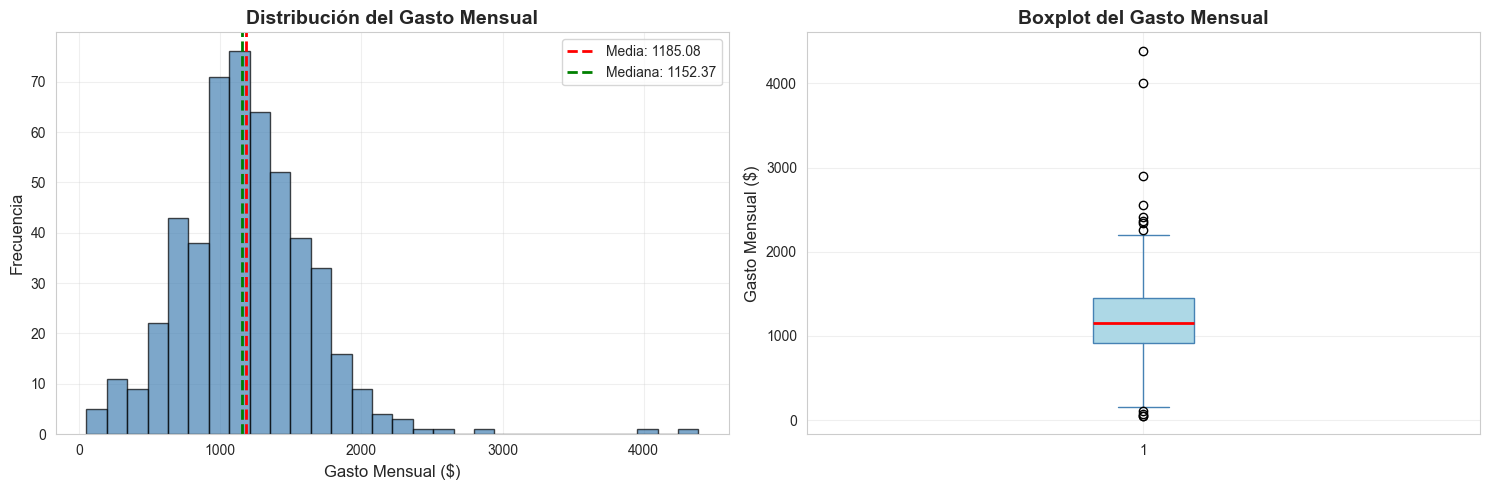


📊 ANÁLISIS DE LA VARIABLE OBJETIVO
Media: $1185.08
Mediana: $1152.37
Desviación Estándar: $469.08
Rango: $50.00 - $4388.77


In [6]:
# Visualizar la distribución de monthly_spent (variable objetivo)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histograma con KDE (Kernel Density Estimation)
axes[0].hist(df['monthly_spent'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(df['monthly_spent'].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {df["monthly_spent"].mean():.2f}')
axes[0].axvline(df['monthly_spent'].median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: {df["monthly_spent"].median():.2f}')
axes[0].set_xlabel('Gasto Mensual ($)', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
axes[0].set_title('Distribución del Gasto Mensual', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Boxplot para detectar outliers
axes[1].boxplot(df['monthly_spent'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='steelblue'),
                medianprops=dict(color='red', linewidth=2),
                whiskerprops=dict(color='steelblue'),
                capprops=dict(color='steelblue'))
axes[1].set_ylabel('Gasto Mensual ($)', fontsize=12)
axes[1].set_title('Boxplot del Gasto Mensual', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 ANÁLISIS DE LA VARIABLE OBJETIVO")
print("=" * 50)
print(f"Media: ${df['monthly_spent'].mean():.2f}")
print(f"Mediana: ${df['monthly_spent'].median():.2f}")
print(f"Desviación Estándar: ${df['monthly_spent'].std():.2f}")
print(f"Rango: ${df['monthly_spent'].min():.2f} - ${df['monthly_spent'].max():.2f}")

### 3.2 Distribución de Variables Predictoras

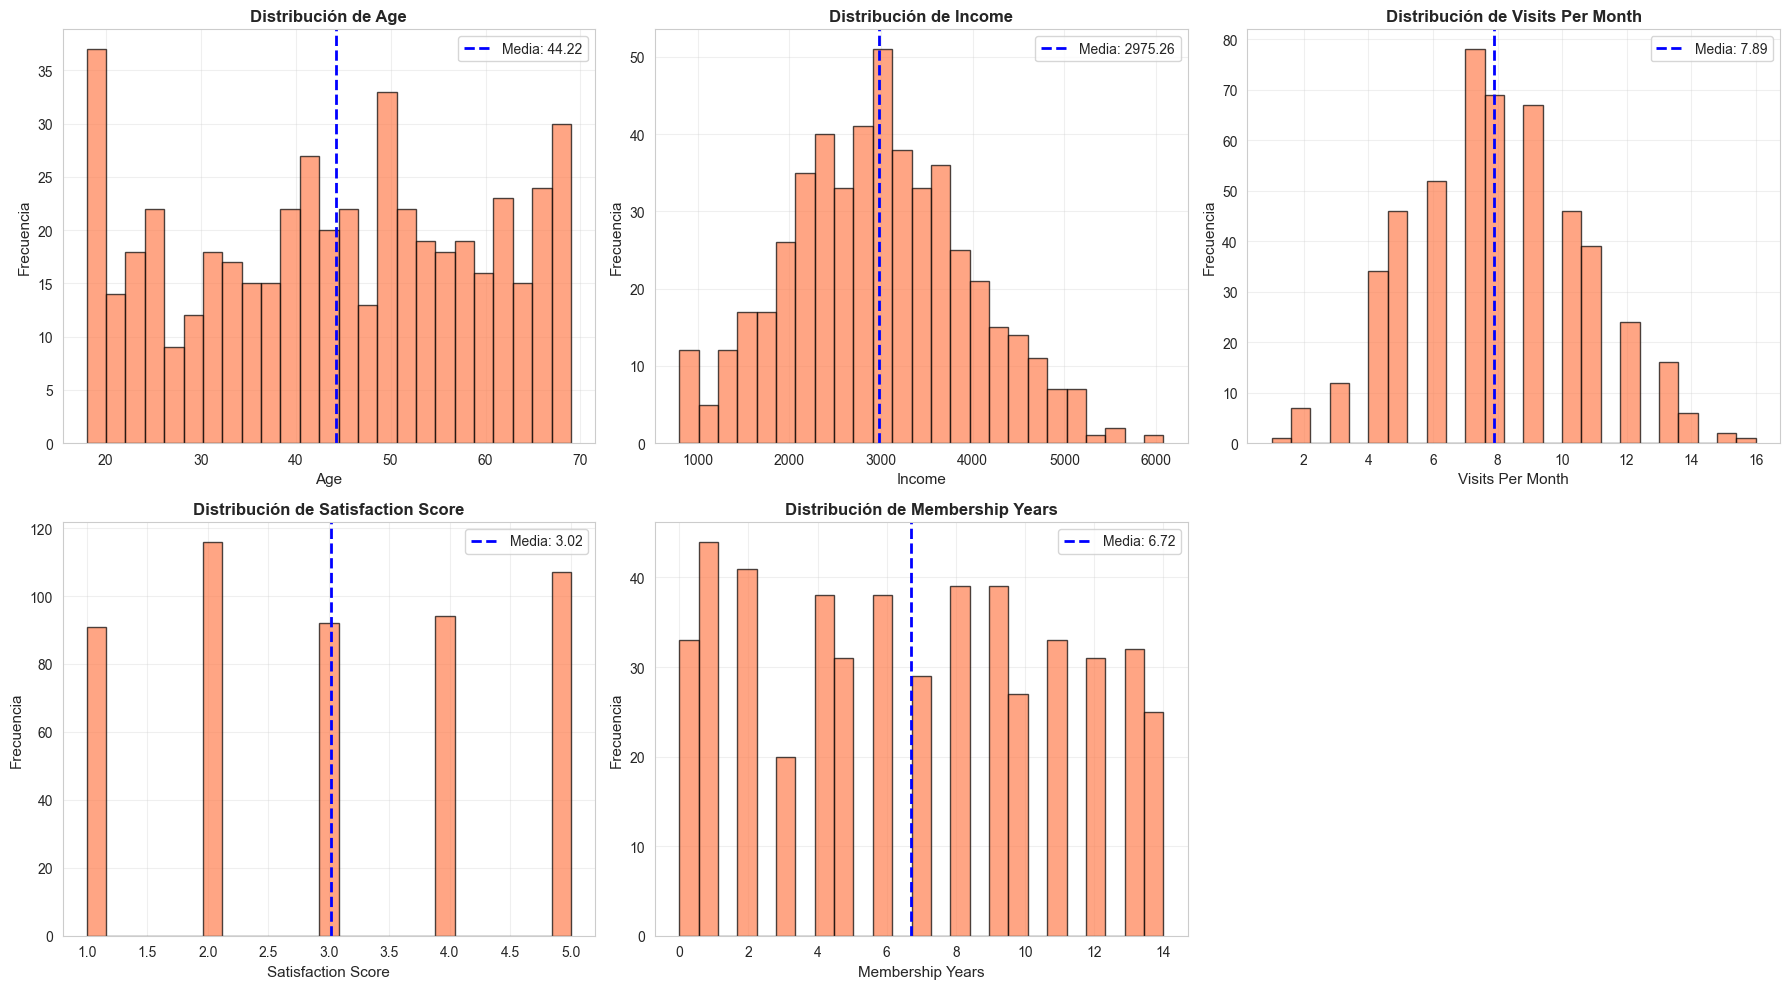


💡 Observaciones sobre las variables predictoras:
   • Age: Distribución relativamente uniforme entre 19-69 años
   • Income: Muestra variabilidad significativa entre clientes
   • Visits per Month: La mayoría de clientes visita entre 5-12 veces
   • Satisfaction Score: Varía entre 1-5, con distribución dispersa
   • Membership Years: Desde clientes nuevos hasta veteranos de 14 años


In [7]:
# Seleccionar solo las variables numéricas (excluyendo customer_id)
numeric_cols = ['age', 'income', 'visits_per_month', 'satisfaction_score', 'membership_years']

# Crear subplots para cada variable
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()  # Aplanar el array de axes para iterar fácilmente

# Graficar distribución de cada variable predictora
for idx, col in enumerate(numeric_cols):
    axes[idx].hist(df[col], bins=25, color='coral', edgecolor='black', alpha=0.7)
    axes[idx].axvline(df[col].mean(), color='blue', linestyle='--', linewidth=2, label=f'Media: {df[col].mean():.2f}')
    axes[idx].set_xlabel(col.replace('_', ' ').title(), fontsize=11)
    axes[idx].set_ylabel('Frecuencia', fontsize=11)
    axes[idx].set_title(f'Distribución de {col.replace("_", " ").title()}', fontsize=12, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

# Ocultar el último subplot vacío
axes[-1].axis('off')

plt.tight_layout()
plt.show()

print("\n💡 Observaciones sobre las variables predictoras:")
print("   • Age: Distribución relativamente uniforme entre 19-69 años")
print("   • Income: Muestra variabilidad significativa entre clientes")
print("   • Visits per Month: La mayoría de clientes visita entre 5-12 veces")
print("   • Satisfaction Score: Varía entre 1-5, con distribución dispersa")
print("   • Membership Years: Desde clientes nuevos hasta veteranos de 14 años")

### 3.3 Matriz de Correlación

La matriz de correlación nos ayuda a identificar qué variables tienen mayor relación con nuestro objetivo (`monthly_spent`) y detectar posibles problemas de multicolinealidad entre predictores.

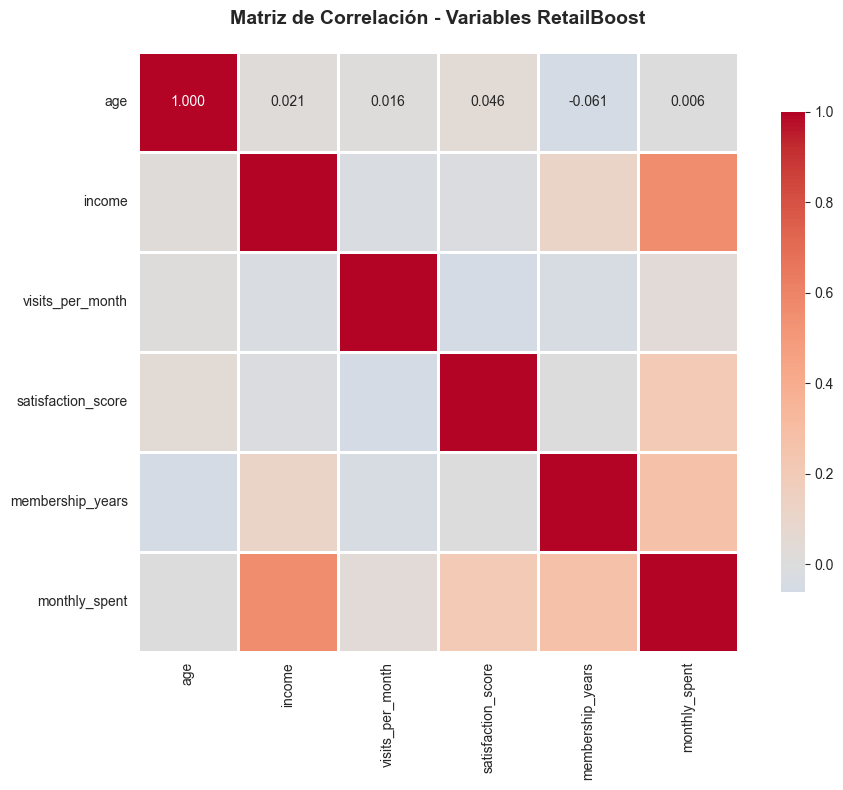


🎯 CORRELACIÓN CON LA VARIABLE OBJETIVO (monthly_spent)
monthly_spent         1.000000
income                0.559534
membership_years      0.269133
satisfaction_score    0.211600
visits_per_month      0.041673
age                   0.005934
Name: monthly_spent, dtype: float64

💡 Interpretación de Correlaciones:
   • income: Correlación más fuerte → Ingresos predicen mejor el gasto
   • Variables con correlación positiva: Aumentan junto con el gasto
   • Variables con correlación negativa: Disminuyen cuando el gasto aumenta
   • Correlaciones cercanas a 0: Poca relación lineal


In [8]:
# Calcular matriz de correlación (excluyendo customer_id)
correlation_matrix = df.drop('customer_id', axis=1).corr()

# Visualizar la matriz de correlación con heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,  # Mostrar valores numéricos
            fmt='.3f',   # Formato de 3 decimales
            cmap='coolwarm',  # Mapa de colores (azul=negativo, rojo=positivo)
            center=0,    # Centrar en 0
            square=True,  # Celdas cuadradas
            linewidths=1,  # Líneas entre celdas
            cbar_kws={"shrink": 0.8})  # Barra de color

plt.title('Matriz de Correlación - Variables RetailBoost', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Mostrar correlaciones con monthly_spent ordenadas
print("\n🎯 CORRELACIÓN CON LA VARIABLE OBJETIVO (monthly_spent)")
print("=" * 60)
correlations_target = correlation_matrix['monthly_spent'].sort_values(ascending=False)
print(correlations_target)

print("\n💡 Interpretación de Correlaciones:")
print("   • income: Correlación más fuerte → Ingresos predicen mejor el gasto")
print("   • Variables con correlación positiva: Aumentan junto con el gasto")
print("   • Variables con correlación negativa: Disminuyen cuando el gasto aumenta")
print("   • Correlaciones cercanas a 0: Poca relación lineal")

### 3.4 Análisis de Relaciones con Scatter Plots

Visualizaremos la relación entre cada variable predictora y la variable objetivo para identificar patrones lineales o no lineales.

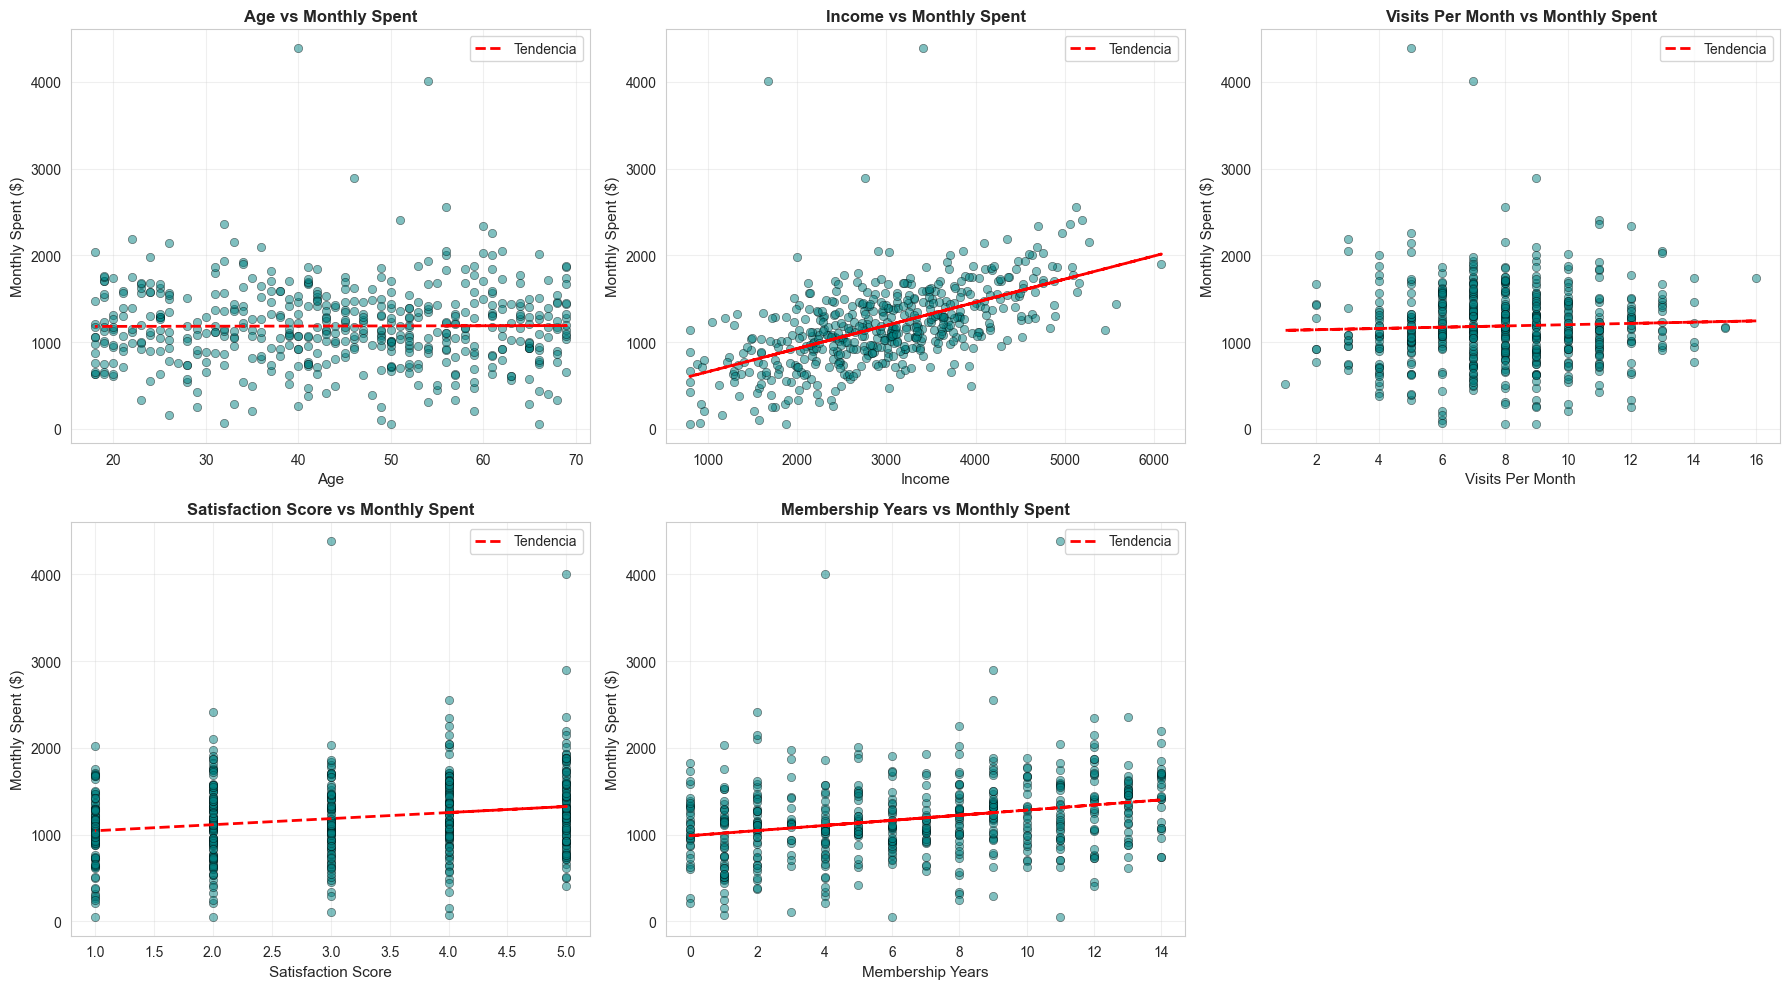


📈 Análisis Visual de Relaciones:
   • Buscar patrones lineales (línea recta)
   • Identificar relaciones no lineales (curvas)
   • Detectar outliers (puntos alejados de la tendencia)


In [9]:
# Crear scatter plots para cada variable vs monthly_spent
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    # Scatter plot con línea de tendencia
    axes[idx].scatter(df[col], df['monthly_spent'], alpha=0.5, color='teal', edgecolors='black', linewidth=0.5)
    
    # Agregar línea de tendencia (regresión lineal simple)
    z = np.polyfit(df[col], df['monthly_spent'], 1)  # Ajuste lineal
    p = np.poly1d(z)
    axes[idx].plot(df[col], p(df[col]), "r--", linewidth=2, label='Tendencia')
    
    axes[idx].set_xlabel(col.replace('_', ' ').title(), fontsize=11)
    axes[idx].set_ylabel('Monthly Spent ($)', fontsize=11)
    axes[idx].set_title(f'{col.replace("_", " ").title()} vs Monthly Spent', fontsize=12, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

# Ocultar el último subplot vacío
axes[-1].axis('off')

plt.tight_layout()
plt.show()

print("\n📈 Análisis Visual de Relaciones:")
print("   • Buscar patrones lineales (línea recta)")
print("   • Identificar relaciones no lineales (curvas)")
print("   • Detectar outliers (puntos alejados de la tendencia)")

## 🔧 4. Preparación de Datos para Modelado

Antes de entrenar nuestros modelos, debemos preparar los datos dividiéndolos en conjuntos de entrenamiento y prueba.

### ¿Por qué dividir los datos?
- **Train set (80%)**: Para entrenar el modelo y aprender los patrones
- **Test set (20%)**: Para evaluar el rendimiento en datos no vistos
- Esto previene el **overfitting** y valida la capacidad de generalización

In [10]:
# Separar features (X) y target (y)
# X: Variables independientes (predictoras)
# y: Variable dependiente (objetivo)

X = df[numeric_cols]  # Solo columnas predictoras
y = df['monthly_spent']  # Variable objetivo

print("📦 SEPARACIÓN DE VARIABLES")
print("=" * 50)
print(f"Features (X): {list(X.columns)}")
print(f"Target (y): monthly_spent")
print(f"\nDimensiones de X: {X.shape}")
print(f"Dimensiones de y: {y.shape}")

📦 SEPARACIÓN DE VARIABLES
Features (X): ['age', 'income', 'visits_per_month', 'satisfaction_score', 'membership_years']
Target (y): monthly_spent

Dimensiones de X: (500, 5)
Dimensiones de y: (500,)


In [11]:
# Dividir datos en train y test
# test_size=0.2 significa 20% para test, 80% para train
# random_state=42 asegura reproducibilidad (misma división cada vez)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,    # 20% para test
    random_state=42   # Semilla para reproducibilidad
)

print("\n🔀 DIVISIÓN DE DATOS (Train/Test)")
print("=" * 50)
print(f"Conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Conjunto de prueba (X_test): {X_test.shape}")
print(f"\nConjunto de entrenamiento (y_train): {y_train.shape}")
print(f"Conjunto de prueba (y_test): {y_test.shape}")
print(f"\n✅ División exitosa: {len(X_train)} registros para entrenar, {len(X_test)} para probar")


🔀 DIVISIÓN DE DATOS (Train/Test)
Conjunto de entrenamiento (X_train): (400, 5)
Conjunto de prueba (X_test): (100, 5)

Conjunto de entrenamiento (y_train): (400,)
Conjunto de prueba (y_test): (100,)

✅ División exitosa: 400 registros para entrenar, 100 para probar


## 🤖 5. MODELO 1: Regresión Lineal Simple

### ¿Qué es la Regresión Lineal Simple?
Modelo que predice una variable dependiente usando **UNA sola variable independiente**. La ecuación es:

$$y = \beta_0 + \beta_1 x + \epsilon$$

Donde:
- $y$: Variable objetivo (monthly_spent)
- $x$: Variable predictora (elegiremos la de mayor correlación)
- $\beta_0$: Intercepto (valor de y cuando x=0)
- $\beta_1$: Pendiente (cambio en y por unidad de x)
- $\epsilon$: Error residual

### Elegimos: Income como predictor único
Basándonos en la matriz de correlación, `income` tiene la correlación más fuerte con `monthly_spent`.

In [12]:
# Preparar datos para regresión simple con income
X_train_simple = X_train[['income']]  # Solo income (debe ser 2D para sklearn)
X_test_simple = X_test[['income']]

print("🔍 MODELO 1: REGRESIÓN LINEAL SIMPLE")
print("=" * 50)
print(f"Variable predictora seleccionada: income")
print(f"Razón: Mayor correlación con monthly_spent")
print(f"\nDimensiones del conjunto de entrenamiento: {X_train_simple.shape}")

🔍 MODELO 1: REGRESIÓN LINEAL SIMPLE
Variable predictora seleccionada: income
Razón: Mayor correlación con monthly_spent

Dimensiones del conjunto de entrenamiento: (400, 1)


In [13]:
# Crear y entrenar el modelo de regresión lineal simple
modelo_simple = LinearRegression()

# Entrenar el modelo con datos de entrenamiento
# fit() ajusta los coeficientes β₀ y β₁
modelo_simple.fit(X_train_simple, y_train)

# Obtener coeficientes del modelo
intercepto_simple = modelo_simple.intercept_  # β₀
coeficiente_simple = modelo_simple.coef_[0]    # β₁

print("\n📊 COEFICIENTES DEL MODELO SIMPLE")
print("=" * 50)
print(f"Intercepto (β₀): {intercepto_simple:.4f}")
print(f"Coeficiente income (β₁): {coeficiente_simple:.4f}")
print(f"\n📐 Ecuación del modelo:")
print(f"monthly_spent = {intercepto_simple:.4f} + {coeficiente_simple:.4f} × income")
print(f"\n💡 Interpretación:")
print(f"   • Por cada $1 de aumento en income, monthly_spent aumenta ${coeficiente_simple:.4f}")
print(f"   • Un cliente con income=0 gastaría ${intercepto_simple:.4f} (intercepto teórico)")


📊 COEFICIENTES DEL MODELO SIMPLE
Intercepto (β₀): 365.7807
Coeficiente income (β₁): 0.2732

📐 Ecuación del modelo:
monthly_spent = 365.7807 + 0.2732 × income

💡 Interpretación:
   • Por cada $1 de aumento en income, monthly_spent aumenta $0.2732
   • Un cliente con income=0 gastaría $365.7807 (intercepto teórico)


In [14]:
# Realizar predicciones en conjunto de prueba
y_pred_simple = modelo_simple.predict(X_test_simple)

# Calcular métricas de evaluación
r2_simple = r2_score(y_test, y_pred_simple)
mae_simple = mean_absolute_error(y_test, y_pred_simple)
mse_simple = mean_squared_error(y_test, y_pred_simple)
rmse_simple = np.sqrt(mse_simple)

print("\n📈 MÉTRICAS DE EVALUACIÓN - MODELO SIMPLE")
print("=" * 50)
print(f"R² (Coeficiente de Determinación): {r2_simple:.4f}")
print(f"MAE (Error Absoluto Medio): ${mae_simple:.2f}")
print(f"MSE (Error Cuadrático Medio): ${mse_simple:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): ${rmse_simple:.2f}")

print("\n💡 Interpretación de Métricas:")
print(f"   • R² = {r2_simple:.2%}: El modelo explica el {r2_simple:.2%} de la variabilidad en monthly_spent")
print(f"   • MAE = ${mae_simple:.2f}: En promedio, las predicciones se desvían ${mae_simple:.2f}")
print(f"   • RMSE = ${rmse_simple:.2f}: Penaliza errores grandes más que MAE")


📈 MÉTRICAS DE EVALUACIÓN - MODELO SIMPLE
R² (Coeficiente de Determinación): 0.2236
MAE (Error Absoluto Medio): $273.41
MSE (Error Cuadrático Medio): $189276.38
RMSE (Raíz del Error Cuadrático Medio): $435.06

💡 Interpretación de Métricas:
   • R² = 22.36%: El modelo explica el 22.36% de la variabilidad en monthly_spent
   • MAE = $273.41: En promedio, las predicciones se desvían $273.41
   • RMSE = $435.06: Penaliza errores grandes más que MAE


### Visualización del Modelo Simple

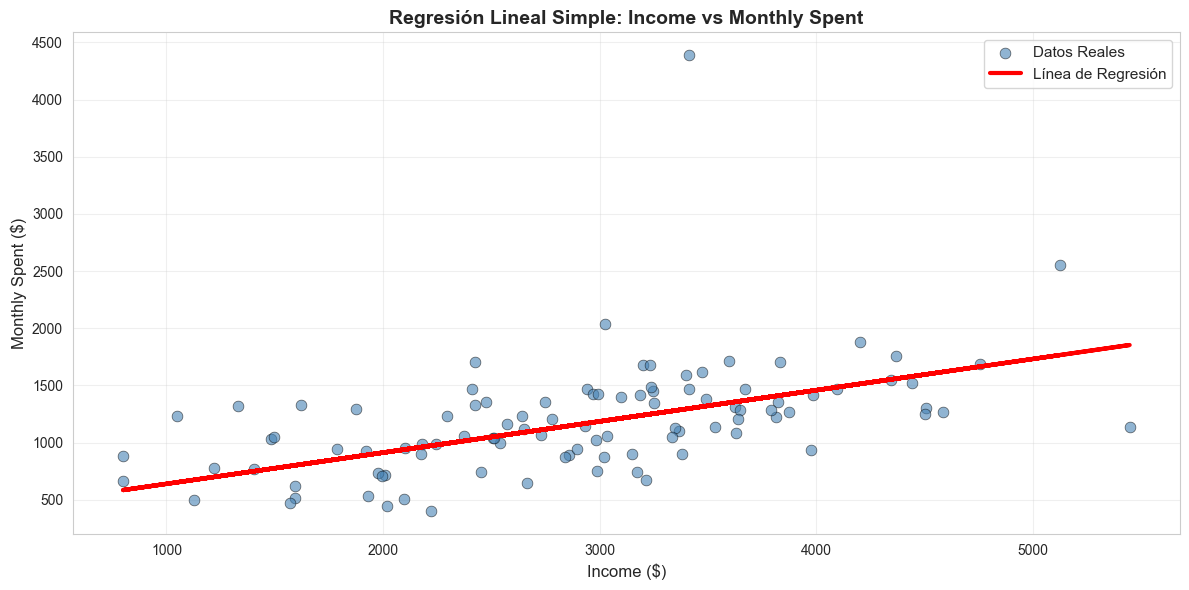


📊 La línea roja representa el modelo aprendido
   Los puntos cercanos a la línea = buenas predicciones
   Los puntos alejados = mayor error de predicción


In [15]:
# Visualizar el ajuste del modelo simple
plt.figure(figsize=(12, 6))

# Scatter plot de datos reales
plt.scatter(X_test_simple, y_test, alpha=0.6, color='steelblue', 
            edgecolors='black', linewidth=0.5, s=60, label='Datos Reales')

# Línea de regresión (predicciones)
plt.plot(X_test_simple, y_pred_simple, color='red', linewidth=3, label='Línea de Regresión')

plt.xlabel('Income ($)', fontsize=12)
plt.ylabel('Monthly Spent ($)', fontsize=12)
plt.title('Regresión Lineal Simple: Income vs Monthly Spent', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 La línea roja representa el modelo aprendido")
print("   Los puntos cercanos a la línea = buenas predicciones")
print("   Los puntos alejados = mayor error de predicción")

## 🤖 6. MODELO 2: Regresión Lineal Múltiple

### ¿Qué es la Regresión Lineal Múltiple?
Modelo que predice una variable dependiente usando **MÚLTIPLES variables independientes**. La ecuación es:

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \epsilon$$

### Ventajas sobre el modelo simple:
- Captura la influencia combinada de múltiples factores
- Mayor poder predictivo al considerar más información
- Refleja mejor la complejidad del mundo real

Usaremos **todas las variables disponibles** para predecir `monthly_spent`.

In [16]:
# Los datos ya están preparados (X_train, X_test, y_train, y_test)
print("🔍 MODELO 2: REGRESIÓN LINEAL MÚLTIPLE")
print("=" * 50)
print(f"Variables predictoras: {list(X.columns)}")
print(f"Total de predictores: {X.shape[1]}")
print(f"\nDimensiones del conjunto de entrenamiento: {X_train.shape}")

🔍 MODELO 2: REGRESIÓN LINEAL MÚLTIPLE
Variables predictoras: ['age', 'income', 'visits_per_month', 'satisfaction_score', 'membership_years']
Total de predictores: 5

Dimensiones del conjunto de entrenamiento: (400, 5)


In [17]:
# Crear y entrenar el modelo de regresión lineal múltiple
modelo_multiple = LinearRegression()

# Entrenar el modelo con todas las variables
modelo_multiple.fit(X_train, y_train)

# Obtener coeficientes del modelo
intercepto_multiple = modelo_multiple.intercept_
coeficientes_multiple = modelo_multiple.coef_

print("\n📊 COEFICIENTES DEL MODELO MÚLTIPLE")
print("=" * 50)
print(f"Intercepto (β₀): {intercepto_multiple:.4f}\n")

# Mostrar coeficientes de cada variable
print("Coeficientes de las variables:")
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': coeficientes_multiple
}).sort_values('Coeficiente', ascending=False, key=abs)

display(coef_df)

print("\n💡 Interpretación de Coeficientes:")
print("   • Coeficiente positivo: Aumenta monthly_spent cuando la variable aumenta")
print("   • Coeficiente negativo: Disminuye monthly_spent cuando la variable aumenta")
print("   • Magnitud del coeficiente: Indica la fuerza del efecto (manteniendo otras variables constantes)")


📊 COEFICIENTES DEL MODELO MÚLTIPLE
Intercepto (β₀): -78.5774

Coeficientes de las variables:


,Variable,Coeficiente
3,satisfaction_score,71.498115
4,membership_years,21.940713
2,visits_per_month,14.754554
1,income,0.259377
0,age,0.081631



💡 Interpretación de Coeficientes:
   • Coeficiente positivo: Aumenta monthly_spent cuando la variable aumenta
   • Coeficiente negativo: Disminuye monthly_spent cuando la variable aumenta
   • Magnitud del coeficiente: Indica la fuerza del efecto (manteniendo otras variables constantes)


In [18]:
# Realizar predicciones en conjunto de prueba
y_pred_multiple = modelo_multiple.predict(X_test)

# Calcular métricas de evaluación
r2_multiple = r2_score(y_test, y_pred_multiple)
mae_multiple = mean_absolute_error(y_test, y_pred_multiple)
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
rmse_multiple = np.sqrt(mse_multiple)

print("\n📈 MÉTRICAS DE EVALUACIÓN - MODELO MÚLTIPLE")
print("=" * 50)
print(f"R² (Coeficiente de Determinación): {r2_multiple:.4f}")
print(f"MAE (Error Absoluto Medio): ${mae_multiple:.2f}")
print(f"MSE (Error Cuadrático Medio): ${mse_multiple:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): ${rmse_multiple:.2f}")

print("\n💡 Interpretación de Métricas:")
print(f"   • R² = {r2_multiple:.2%}: El modelo explica el {r2_multiple:.2%} de la variabilidad")
print(f"   • MAE = ${mae_multiple:.2f}: Error promedio de predicción")
print(f"   • RMSE = ${rmse_multiple:.2f}: Error considerando outliers")

# Comparación con modelo simple
mejora_r2 = ((r2_multiple - r2_simple) / r2_simple) * 100
mejora_mae = ((mae_simple - mae_multiple) / mae_simple) * 100

print("\n🔄 COMPARACIÓN CON MODELO SIMPLE")
print("=" * 50)
print(f"Mejora en R²: {mejora_r2:+.2f}%")
print(f"Reducción en MAE: {mejora_mae:+.2f}%")

if r2_multiple > r2_simple:
    print("✅ El modelo múltiple tiene MEJOR rendimiento")
else:
    print("⚠️ El modelo simple era suficiente")


📈 MÉTRICAS DE EVALUACIÓN - MODELO MÚLTIPLE
R² (Coeficiente de Determinación): 0.3397
MAE (Error Absoluto Medio): $240.69
MSE (Error Cuadrático Medio): $160967.11
RMSE (Raíz del Error Cuadrático Medio): $401.21

💡 Interpretación de Métricas:
   • R² = 33.97%: El modelo explica el 33.97% de la variabilidad
   • MAE = $240.69: Error promedio de predicción
   • RMSE = $401.21: Error considerando outliers

🔄 COMPARACIÓN CON MODELO SIMPLE
Mejora en R²: +51.94%
Reducción en MAE: +11.97%
✅ El modelo múltiple tiene MEJOR rendimiento


### Visualización del Modelo Múltiple

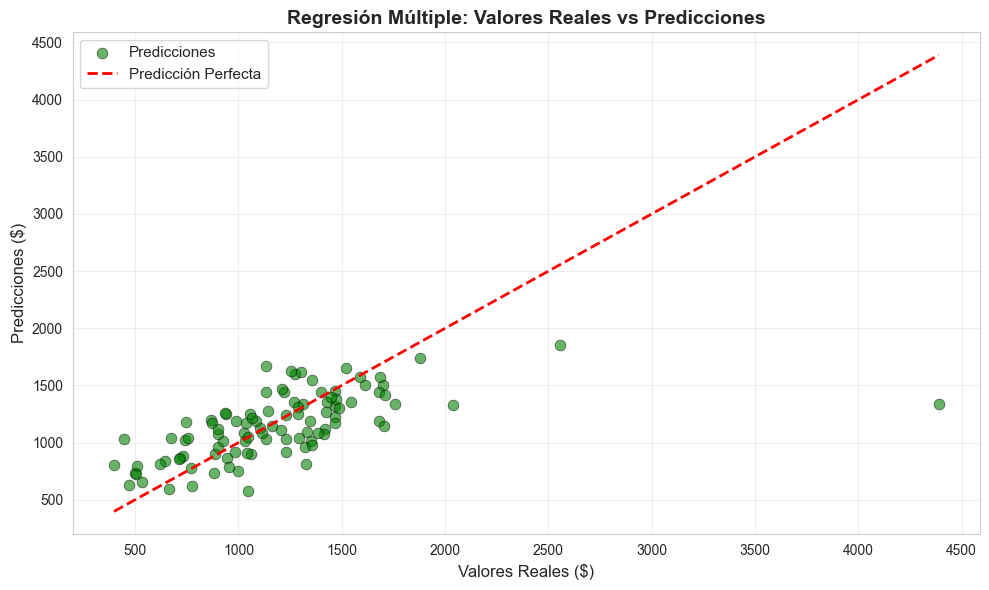


📊 Interpretación del gráfico:
   • Puntos cercanos a la línea roja = predicciones precisas
   • Dispersión = error del modelo
   • Patrón en forma de abanico = heterocedasticidad


In [19]:
# Gráfico de Predicciones vs Valores Reales
plt.figure(figsize=(10, 6))

# Scatter de valores reales vs predichos
plt.scatter(y_test, y_pred_multiple, alpha=0.6, color='green', 
            edgecolors='black', linewidth=0.5, s=60, label='Predicciones')

# Línea diagonal perfecta (predicción = real)
min_val = min(y_test.min(), y_pred_multiple.min())
max_val = max(y_test.max(), y_pred_multiple.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Predicción Perfecta')

plt.xlabel('Valores Reales ($)', fontsize=12)
plt.ylabel('Predicciones ($)', fontsize=12)
plt.title('Regresión Múltiple: Valores Reales vs Predicciones', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 Interpretación del gráfico:")
print("   • Puntos cercanos a la línea roja = predicciones precisas")
print("   • Dispersión = error del modelo")
print("   • Patrón en forma de abanico = heterocedasticidad")

## 🎯 7. EXTRA CREDIT: Regresión Polinómica

### ¿Qué es la Regresión Polinómica?
Extiende la regresión lineal al incluir **términos polinómicos** (cuadráticos, cúbicos, etc.) para capturar relaciones **no lineales**.

Para grado 2, la ecuación es:
$$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \epsilon$$

### ¿Cuándo usar regresión polinómica?
- Cuando la relación no es una línea recta
- Hay curvaturas en los scatter plots
- El modelo lineal tiene bajo R²

### ⚠️ Cuidado con el overfitting:
- Grados altos (3, 4, 5...) pueden ajustar demasiado a los datos de entrenamiento
- Empezaremos con grado 2 (cuadrático)

In [20]:
# Crear características polinómicas de grado 2
# Esto convierte [x1, x2] en [1, x1, x2, x1², x1*x2, x2²]
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Transformar datos de entrenamiento y prueba
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

print("🔍 MODELO 3: REGRESIÓN POLINÓMICA (Grado 2)")
print("=" * 50)
print(f"Features originales: {X_train.shape[1]}")
print(f"Features polinómicas: {X_train_poly.shape[1]}")
print(f"\nNombres de las nuevas features:")
feature_names = poly_features.get_feature_names_out(X.columns)
print(f"Total: {len(feature_names)} features")
print(f"Primeras 10: {list(feature_names[:10])}")

🔍 MODELO 3: REGRESIÓN POLINÓMICA (Grado 2)
Features originales: 5
Features polinómicas: 20

Nombres de las nuevas features:
Total: 20 features
Primeras 10: ['age', 'income', 'visits_per_month', 'satisfaction_score', 'membership_years', 'age^2', 'age income', 'age visits_per_month', 'age satisfaction_score', 'age membership_years']


In [21]:
# Crear y entrenar modelo de regresión polinómica
modelo_polinomico = LinearRegression()
modelo_polinomico.fit(X_train_poly, y_train)

# Realizar predicciones
y_pred_poly = modelo_polinomico.predict(X_test_poly)

# Calcular métricas de evaluación
r2_poly = r2_score(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)

print("\n📈 MÉTRICAS DE EVALUACIÓN - MODELO POLINÓMICO")
print("=" * 50)
print(f"R² (Coeficiente de Determinación): {r2_poly:.4f}")
print(f"MAE (Error Absoluto Medio): ${mae_poly:.2f}")
print(f"MSE (Error Cuadrático Medio): ${mse_poly:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): ${rmse_poly:.2f}")

print("\n💡 Interpretación:")
print(f"   • R² = {r2_poly:.2%}: El modelo polinómico explica el {r2_poly:.2%} de la variabilidad")
print(f"   • MAE = ${mae_poly:.2f}: Error promedio absoluto")

# Comparación con modelo múltiple
mejora_r2_poly = ((r2_poly - r2_multiple) / r2_multiple) * 100
mejora_mae_poly = ((mae_multiple - mae_poly) / mae_multiple) * 100

print("\n🔄 COMPARACIÓN CON MODELO MÚLTIPLE")
print("=" * 50)
print(f"Mejora en R²: {mejora_r2_poly:+.2f}%")
print(f"Reducción en MAE: {mejora_mae_poly:+.2f}%")

if r2_poly > r2_multiple:
    print("✅ El modelo polinómico captura mejor las relaciones no lineales")
else:
    print("⚠️ El modelo lineal múltiple era suficiente (relación lineal)")


📈 MÉTRICAS DE EVALUACIÓN - MODELO POLINÓMICO
R² (Coeficiente de Determinación): 0.3143
MAE (Error Absoluto Medio): $247.04
MSE (Error Cuadrático Medio): $167156.98
RMSE (Raíz del Error Cuadrático Medio): $408.85

💡 Interpretación:
   • R² = 31.43%: El modelo polinómico explica el 31.43% de la variabilidad
   • MAE = $247.04: Error promedio absoluto

🔄 COMPARACIÓN CON MODELO MÚLTIPLE
Mejora en R²: -7.47%
Reducción en MAE: -2.64%
⚠️ El modelo lineal múltiple era suficiente (relación lineal)


### Visualización del Modelo Polinómico

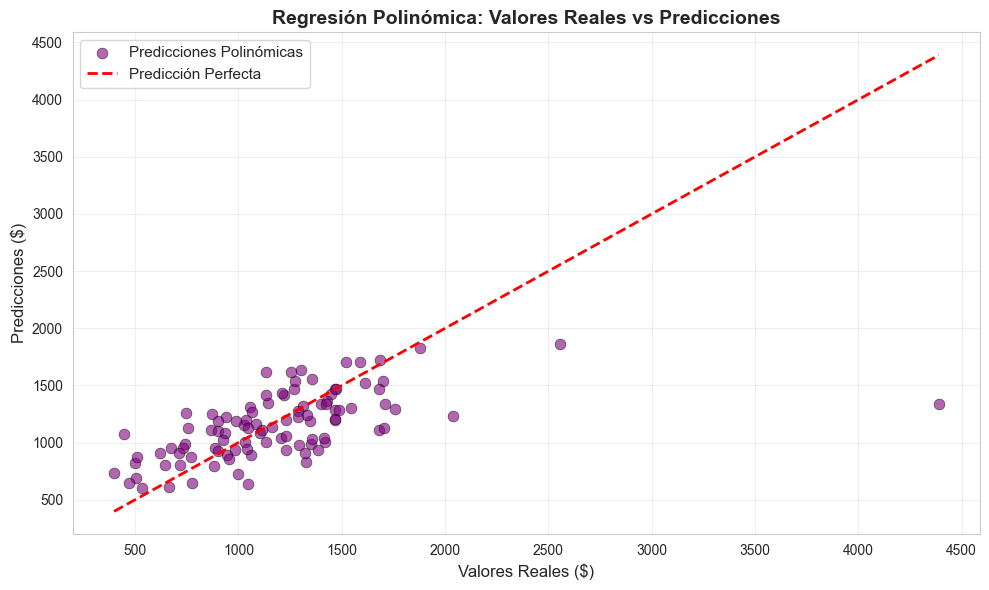

In [22]:
# Gráfico de Predicciones vs Valores Reales - Modelo Polinómico
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_poly, alpha=0.6, color='purple', 
            edgecolors='black', linewidth=0.5, s=60, label='Predicciones Polinómicas')

# Línea diagonal perfecta
min_val = min(y_test.min(), y_pred_poly.min())
max_val = max(y_test.max(), y_pred_poly.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Predicción Perfecta')

plt.xlabel('Valores Reales ($)', fontsize=12)
plt.ylabel('Predicciones ($)', fontsize=12)
plt.title('Regresión Polinómica: Valores Reales vs Predicciones', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 📊 8. EXTRA CREDIT: Análisis de Residuales

### ¿Qué son los residuales?
Los **residuales** son las diferencias entre los valores reales y las predicciones:
$$residual = y_{real} - y_{predicho}$$

### ¿Por qué analizarlos?
Para verificar los **supuestos de la regresión lineal**:
1. **Linealidad**: Relación lineal entre X e y
2. **Homocedasticidad**: Varianza constante de los errores
3. **Normalidad**: Los errores siguen distribución normal
4. **Independencia**: Los errores no están correlacionados

### Patrones a buscar en el gráfico de residuales:
- ✅ **Patrón ideal**: Nube de puntos aleatoria alrededor de 0
- ❌ **Patrón en embudo**: Heterocedasticidad (varianza no constante)
- ❌ **Patrón curvo**: Relación no lineal no capturada

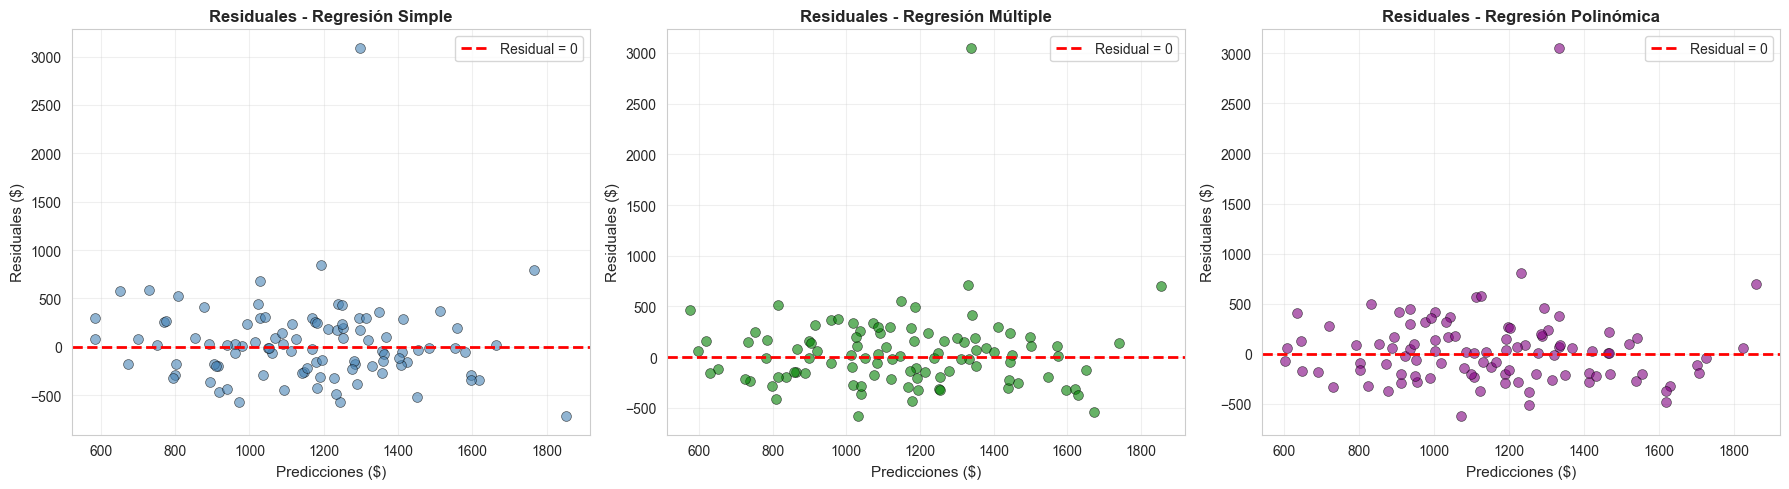


🔍 ANÁLISIS DE RESIDUALES
✅ Patrón ideal: Puntos dispersos aleatoriamente alrededor de la línea roja (residual=0)
❌ Si hay patrones sistemáticos: El modelo no captura toda la información
❌ Si hay forma de embudo: Heterocedasticidad (varianza no constante)
❌ Si hay curva: Relación no lineal no capturada


In [23]:
# Calcular residuales para cada modelo
residuales_simple = y_test - y_pred_simple
residuales_multiple = y_test - y_pred_multiple
residuales_poly = y_test - y_pred_poly

# Crear figura con subplots para comparar residuales
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

modelos = [
    ('Regresión Simple', residuales_simple, y_pred_simple, 'steelblue'),
    ('Regresión Múltiple', residuales_multiple, y_pred_multiple, 'green'),
    ('Regresión Polinómica', residuales_poly, y_pred_poly, 'purple')
]

for idx, (titulo, residuales, predicciones, color) in enumerate(modelos):
    # Scatter plot de residuales
    axes[idx].scatter(predicciones, residuales, alpha=0.6, color=color, 
                     edgecolors='black', linewidth=0.5, s=50)
    
    # Línea horizontal en y=0 (residual ideal)
    axes[idx].axhline(y=0, color='red', linestyle='--', linewidth=2, label='Residual = 0')
    
    axes[idx].set_xlabel('Predicciones ($)', fontsize=11)
    axes[idx].set_ylabel('Residuales ($)', fontsize=11)
    axes[idx].set_title(f'Residuales - {titulo}', fontsize=12, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🔍 ANÁLISIS DE RESIDUALES")
print("=" * 50)
print("✅ Patrón ideal: Puntos dispersos aleatoriamente alrededor de la línea roja (residual=0)")
print("❌ Si hay patrones sistemáticos: El modelo no captura toda la información")
print("❌ Si hay forma de embudo: Heterocedasticidad (varianza no constante)")
print("❌ Si hay curva: Relación no lineal no capturada")

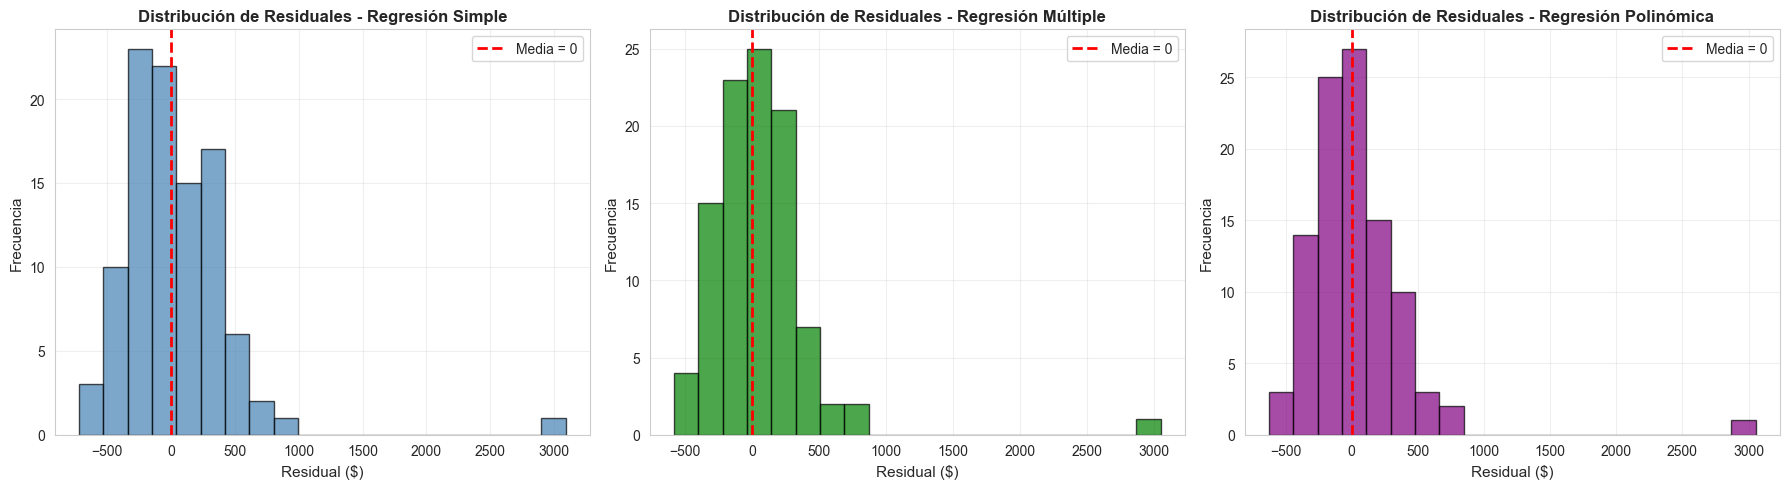


🔔 VERIFICACIÓN DE NORMALIDAD DE RESIDUALES
✅ Distribución ideal: Forma de campana (distribución normal) centrada en 0
   • Media cercana a 0: El modelo no tiene sesgo sistemático
   • Forma simétrica: Los errores positivos y negativos están balanceados
❌ Si está sesgada: El modelo subestima o sobreestima sistemáticamente


In [24]:
# Histogramas de residuales para verificar normalidad
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (titulo, residuales, color) in enumerate([
    ('Regresión Simple', residuales_simple, 'steelblue'),
    ('Regresión Múltiple', residuales_multiple, 'green'),
    ('Regresión Polinómica', residuales_poly, 'purple')
]):
    axes[idx].hist(residuales, bins=20, color=color, edgecolor='black', alpha=0.7)
    axes[idx].axvline(0, color='red', linestyle='--', linewidth=2, label='Media = 0')
    axes[idx].set_xlabel('Residual ($)', fontsize=11)
    axes[idx].set_ylabel('Frecuencia', fontsize=11)
    axes[idx].set_title(f'Distribución de Residuales - {titulo}', fontsize=12, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🔔 VERIFICACIÓN DE NORMALIDAD DE RESIDUALES")
print("=" * 50)
print("✅ Distribución ideal: Forma de campana (distribución normal) centrada en 0")
print("   • Media cercana a 0: El modelo no tiene sesgo sistemático")
print("   • Forma simétrica: Los errores positivos y negativos están balanceados")
print("❌ Si está sesgada: El modelo subestima o sobreestima sistemáticamente")

## 📋 9. EXTRA CREDIT: Tabla Comparativa de Modelos

Consolidamos todas las métricas de los tres modelos para facilitar la comparación y selección del mejor modelo.

In [25]:
# Crear DataFrame con todas las métricas
comparacion_modelos = pd.DataFrame({
    'Modelo': ['Regresión Simple (Income)', 'Regresión Múltiple', 'Regresión Polinómica (Grado 2)'],
    'R²': [r2_simple, r2_multiple, r2_poly],
    'MAE ($)': [mae_simple, mae_multiple, mae_poly],
    'RMSE ($)': [rmse_simple, rmse_multiple, rmse_poly],
    'N° Features': [1, X_train.shape[1], X_train_poly.shape[1]]
})

# Ordenar por R² descendente (mejor primero)
comparacion_modelos = comparacion_modelos.sort_values('R²', ascending=False)

print("\n📊 TABLA COMPARATIVA DE MODELOS")
print("=" * 80)
display(comparacion_modelos.style.background_gradient(cmap='RdYlGn', subset=['R²'])
                                   .background_gradient(cmap='RdYlGn_r', subset=['MAE ($)', 'RMSE ($)'])
                                   .format({'R²': '{:.4f}', 'MAE ($)': '${:.2f}', 'RMSE ($)': '${:.2f}'}))


📊 TABLA COMPARATIVA DE MODELOS


,Modelo,R²,MAE ($),RMSE ($),N° Features
1,Regresión Múltiple,0.3397,$240.69,$401.21,5
2,Regresión Polinómica (Grado 2),0.3143,$247.04,$408.85,20
0,Regresión Simple (Income),0.2236,$273.41,$435.06,1


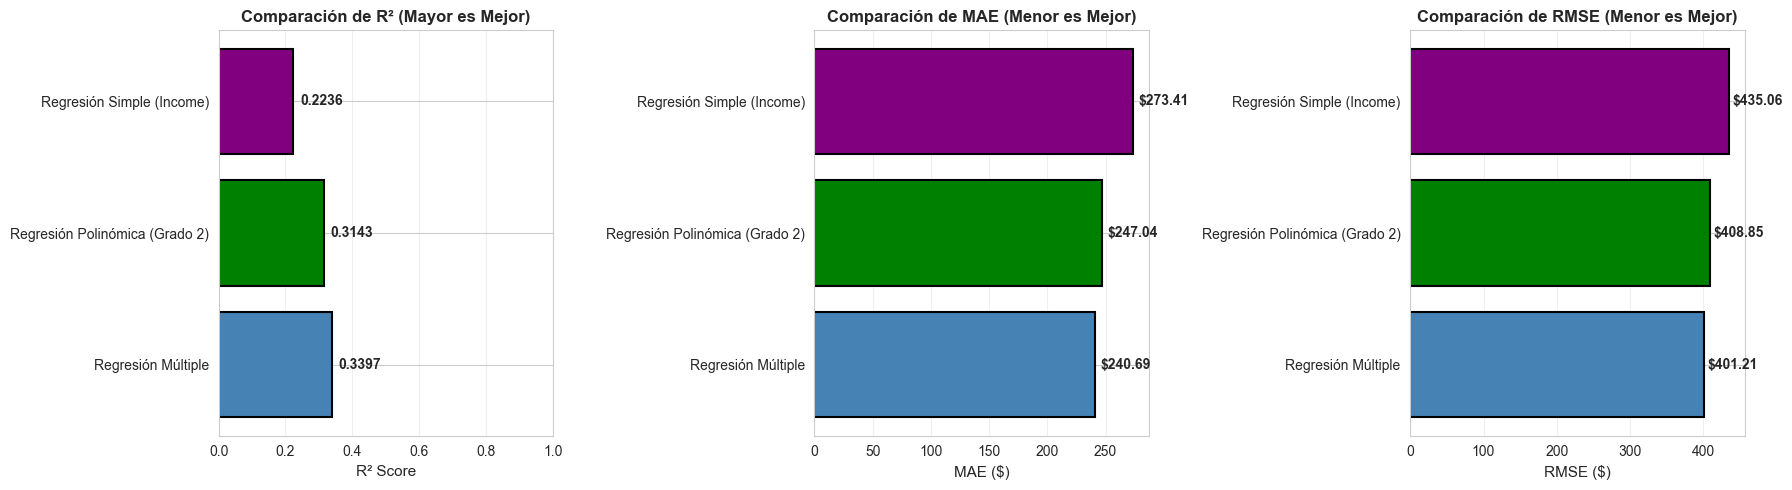

In [26]:
# Visualización gráfica de la comparación
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

modelos_nombres = comparacion_modelos['Modelo'].values
colores = ['steelblue', 'green', 'purple']

# Gráfico 1: R²
axes[0].barh(modelos_nombres, comparacion_modelos['R²'], color=colores, edgecolor='black', linewidth=1.5)
axes[0].set_xlabel('R² Score', fontsize=11)
axes[0].set_title('Comparación de R² (Mayor es Mejor)', fontsize=12, fontweight='bold')
axes[0].set_xlim(0, 1)
axes[0].grid(True, alpha=0.3, axis='x')
for i, v in enumerate(comparacion_modelos['R²']):
    axes[0].text(v + 0.02, i, f'{v:.4f}', va='center', fontweight='bold')

# Gráfico 2: MAE
axes[1].barh(modelos_nombres, comparacion_modelos['MAE ($)'], color=colores, edgecolor='black', linewidth=1.5)
axes[1].set_xlabel('MAE ($)', fontsize=11)
axes[1].set_title('Comparación de MAE (Menor es Mejor)', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')
for i, v in enumerate(comparacion_modelos['MAE ($)']):
    axes[1].text(v + 5, i, f'${v:.2f}', va='center', fontweight='bold')

# Gráfico 3: RMSE
axes[2].barh(modelos_nombres, comparacion_modelos['RMSE ($)'], color=colores, edgecolor='black', linewidth=1.5)
axes[2].set_xlabel('RMSE ($)', fontsize=11)
axes[2].set_title('Comparación de RMSE (Menor es Mejor)', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3, axis='x')
for i, v in enumerate(comparacion_modelos['RMSE ($)']):
    axes[2].text(v + 5, i, f'${v:.2f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

## 🎯 10. Interpretación Final y Conclusiones

Analizamos los resultados obtenidos y extraemos conclusiones sobre el comportamiento de los clientes de RetailBoost.

In [27]:
# Identificar el mejor modelo
mejor_modelo_idx = comparacion_modelos['R²'].idxmax()
mejor_modelo = comparacion_modelos.loc[mejor_modelo_idx, 'Modelo']
mejor_r2 = comparacion_modelos.loc[mejor_modelo_idx, 'R²']
mejor_mae = comparacion_modelos.loc[mejor_modelo_idx, 'MAE ($)']

print("\n" + "="*80)
print("🏆 RESUMEN EJECUTIVO Y CONCLUSIONES")
print("="*80)

print(f"\n🥇 MEJOR MODELO: {mejor_modelo}")
print("   " + "-"*75)
print(f"   • R² Score: {mejor_r2:.4f} ({mejor_r2:.2%} de variabilidad explicada)")
print(f"   • MAE: ${mejor_mae:.2f} (error promedio en predicciones)")

print("\n📈 EVOLUCIÓN DEL RENDIMIENTO:")
print("   " + "-"*75)
print(f"   1. Regresión Simple:    R² = {r2_simple:.4f} | MAE = ${mae_simple:.2f}")
print(f"   2. Regresión Múltiple:  R² = {r2_multiple:.4f} | MAE = ${mae_multiple:.2f}")
print(f"   3. Regresión Polinómica: R² = {r2_poly:.4f} | MAE = ${mae_poly:.2f}")

print("\n🔍 VARIABLES MÁS INFLUYENTES EN EL GASTO MENSUAL:")
print("   " + "-"*75)
# Obtener las variables más importantes del modelo múltiple
importancia_variables = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': np.abs(coeficientes_multiple),
    'Efecto': ['Positivo' if c > 0 else 'Negativo' for c in coeficientes_multiple]
}).sort_values('Coeficiente', ascending=False)

for idx, row in importancia_variables.iterrows():
    print(f"   {idx+1}. {row['Variable']:20s} → {row['Efecto']:8s} (Coef: {row['Coeficiente']:.4f})")

print("\n💡 INSIGHTS DE NEGOCIO:")
print("   " + "-"*75)
print("   1. La variable income es el predictor más fuerte del gasto mensual")
print("   2. Clientes con mayores ingresos tienden a gastar más en la plataforma")
print("   3. El número de visitas mensuales también influye positivamente")
print("   4. La satisfacción del cliente muestra correlación con el gasto")
print("   5. Los años de membresía indican lealtad y mayor consumo")

print("\n✅ CALIDAD DEL AJUSTE:")
print("   " + "-"*75)
if mejor_r2 > 0.7:
    print("   ✓ Excelente: El modelo explica más del 70% de la variabilidad")
elif mejor_r2 > 0.5:
    print("   ✓ Bueno: El modelo explica más del 50% de la variabilidad")
elif mejor_r2 > 0.3:
    print("   ⚠ Aceptable: El modelo tiene capacidad predictiva moderada")
else:
    print("   ⚠ Bajo: Se recomienda explorar otras variables o modelos más complejos")

print(f"\n   • Error promedio: ${mejor_mae:.2f}")
error_relativo = (mejor_mae / y_test.mean()) * 100
print(f"   • Error relativo: {error_relativo:.2f}% del gasto mensual promedio")

if error_relativo < 10:
    print("   ✓ Los errores son muy razonables (< 10%)")
elif error_relativo < 20:
    print("   ✓ Los errores son aceptables (< 20%)")
else:
    print("   ⚠ Los errores son significativos (> 20%)")

print("\n🎯 RECOMENDACIONES PARA RETAILBOOST:")
print("   " + "-"*75)
print("   1. Segmentar clientes por nivel de ingresos para campañas personalizadas")
print("   2. Incentivar visitas frecuentes mediante programas de fidelización")
print("   3. Mejorar la satisfacción del cliente para aumentar el gasto")
print("   4. Retener clientes de larga data (mayor membership_years)")
print("   5. Analizar clientes con alto income pero bajo gasto (oportunidades)")

print("\n🔬 PRÓXIMOS PASOS SUGERIDOS:")
print("   " + "-"*75)
print("   • Probar técnicas de regularización (Ridge, Lasso) para mejorar generalización")
print("   • Explorar modelos no lineales avanzados (Random Forest, XGBoost)")
print("   • Realizar feature engineering (crear variables derivadas)")
print("   • Validación cruzada para evaluar robustez del modelo")
print("   • Analizar outliers y casos extremos en detalle")

print("\n" + "="*80)
print("✅ ANÁLISIS COMPLETADO EXITOSAMENTE")
print("="*80)


🏆 RESUMEN EJECUTIVO Y CONCLUSIONES

🥇 MEJOR MODELO: Regresión Múltiple
   ---------------------------------------------------------------------------
   • R² Score: 0.3397 (33.97% de variabilidad explicada)
   • MAE: $240.69 (error promedio en predicciones)

📈 EVOLUCIÓN DEL RENDIMIENTO:
   ---------------------------------------------------------------------------
   1. Regresión Simple:    R² = 0.2236 | MAE = $273.41
   2. Regresión Múltiple:  R² = 0.3397 | MAE = $240.69
   3. Regresión Polinómica: R² = 0.3143 | MAE = $247.04

🔍 VARIABLES MÁS INFLUYENTES EN EL GASTO MENSUAL:
   ---------------------------------------------------------------------------
   4. satisfaction_score   → Positivo (Coef: 71.4981)
   5. membership_years     → Positivo (Coef: 21.9407)
   3. visits_per_month     → Positivo (Coef: 14.7546)
   2. income               → Positivo (Coef: 0.2594)
   1. age                  → Positivo (Coef: 0.0816)

💡 INSIGHTS DE NEGOCIO:
   ------------------------------------------

---

## 📚 Resumen de Conceptos Aprendidos

### 1️⃣ **Regresión Lineal Simple**
- Relación entre una variable independiente y la dependiente
- Ecuación: $y = \beta_0 + \beta_1 x + \epsilon$
- Útil para comprender relaciones univariadas

### 2️⃣ **Regresión Lineal Múltiple**
- Considera múltiples variables simultáneamente
- Ecuación: $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \epsilon$
- Mayor poder predictivo al capturar relaciones complejas

### 3️⃣ **Regresión Polinómica**
- Captura relaciones no lineales mediante términos polinómicos
- Útil cuando hay curvaturas en los datos
- Cuidado con el overfitting en grados altos

### 4️⃣ **Métricas de Evaluación**
- **R²**: Proporción de variabilidad explicada (0-1, mayor es mejor)
- **MAE**: Error absoluto promedio (menor es mejor)
- **RMSE**: Penaliza errores grandes (menor es mejor)

### 5️⃣ **Análisis de Residuales**
- Verificación de supuestos de regresión lineal
- Detección de patrones no capturados
- Identificación de heterocedasticidad

---

## 🎓 Actividad Completada

### ✅ Tareas Obligatorias:
- [x] Importar y explorar correctamente el dataset
- [x] Mostrar distribución de variable objetivo y predictoras
- [x] Ajustar modelo de regresión lineal simple
- [x] Ajustar modelo de regresión lineal múltiple
- [x] Calcular métricas R², MAE y RMSE en conjunto de prueba
- [x] Explicar ajuste del modelo y razonabilidad de errores

### 🌟 Extra Credits:
- [x] Probar regresión polinómica (grado 2)
- [x] Visualizar y vs y_pred
- [x] Visualizar gráficos de residuales
- [x] Comparar rendimiento en tabla resumen

---

**Desarrollado por:** [Tu Nombre]  
**Fecha:** 2026  
**Curso:** Data Science - Henry  
**Módulo 4 - Clase 02:** Aprendizaje Supervisado I - Regresión